### **Quick introduction to jupyter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Running it again deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

### **Setup**

In [ ]:
import os
import tensorflow as tf

# If there are multiple GPUs and we only want to use one/some, set the number in the visible device list.
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

### **1. Loading the dataset**
This assignment will focus on the CIFAR10 dataset. This is a collection of small images in 10 classes such as cars, cats, birds, etc. You can find more information here: https://www.cs.toronto.edu/~kriz/cifar.html. We start by loading and examining the data.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
Shape of training data:
(50000, 32, 32, 3)
(50000, 1)
Shape of test data:
(10000, 32, 32, 3)
(10000, 1)


#### **<span style="color:red">Question 1:</span>**
The shape of X_train and X_test has 4 values. What do each of these represent?

#### **<span style="color:green">Answer:</span>**
In respective order the output represents the amount of pictures (50 000), dimensions (32x32) and color channels (3)

##### **Plotting some images**
This plots a random selection of images from each class. Rerun the cell to see a different selection.

In [ ]:
from google.colab import drive # connecting to drive to use be able to use utils
drive.mount('/gdrive')
%cd /gdrive/MyDrive/NeuralaN/LabCode/A2_DeepLearning

Mounted at /gdrive
/gdrive/MyDrive/NeuralaN/LabCode/A2_DeepLearning


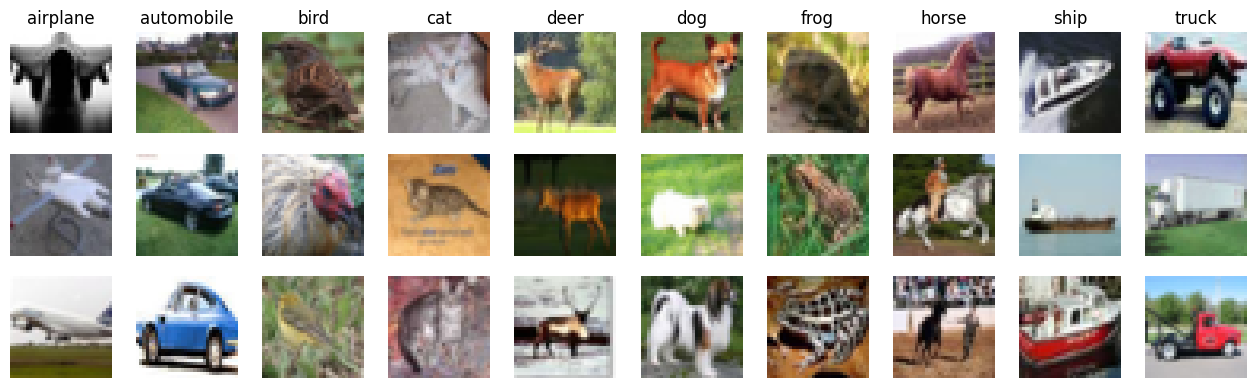

In [ ]:
from Custom import PlotRandomFromEachClass

cifar_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
PlotRandomFromEachClass(X_train, y_train, 3, labels=cifar_labels)

##### **Preparing the dataset**
Just like the MNIST dataset we normalize the images to [0,1] and transform the class indices to one-hot encoded vectors.

In [ ]:
from tensorflow.keras.utils import to_categorical

# Transform label indices to one-hot encoded vectors
y_train_c = to_categorical(y_train, num_classes=10)
y_test_c  = to_categorical(y_test , num_classes=10)

# Normalization of pixel values (to [0-1] range)
X_train = X_train.astype('float32') / 255
X_test  = X_test.astype('float32')  / 255

### **2. Fully connected classifier**
We will start by creating a fully connected classifier using the ```Dense``` layer. We give you the first layer that flattens the image features to a single vector. Add the remaining layers to the network.

Consider what the size of the output must be and what activation function you should use in the output layer.

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten

x_in = Input(shape=X_train.shape[1:])
x = Flatten()(x_in)

x = Dense(128, activation='relu')(x) # relu as activation
x = Dense(64, activation='relu')(x) # relu as activation
x = Dense(16, activation='relu')(x) # relu as activation
x = Dense(10, activation='softmax')(x) # 10 units as we have 10 labels
# ============================================

model = Model(inputs=x_in, outputs=x)

# Now we build the model using Stochastic Gradient Descent with Nesterov momentum. We use accuracy as the metric.
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary(100)

Model: "model"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_1 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 flatten (Flatten)                           (None, 3072)                            0              
                                                                                                    
 dense (Dense)                               (None, 128)                             393344         
                                                                                                    
 dense_1 (Dense)                             (None, 64)                              8256           
                                                                            

##### **Training the model**
In order to show the differences between models in the first parts of the assignment, we will restrict the training to the following command using 15 epochs, batch size 32, and 20% validation data. From section 5 and forward you can change this as you please to increase the accuracy, but for now stick with this command.

In [ ]:
history = model.fit(X_train,y_train_c, epochs=15, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 6s 4ms/step - loss: 1.9200 - accuracy: 0.2973 - val_loss: 1.8203 - val_accuracy: 0.3484
Epoch 2/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7382 - accuracy: 0.3737 - val_loss: 1.7116 - val_accuracy: 0.3838
Epoch 3/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6639 - accuracy: 0.3991 - val_loss: 1.6681 - val_accuracy: 0.3978
Epoch 4/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6190 - accuracy: 0.4157 - val_loss: 1.6429 - val_accuracy: 0.4126
Epoch 5/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5857 - accuracy: 0.4319 - val_loss: 1.6376 - val_accuracy: 0.4116
Epoch 6/15
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5550 - accuracy: 0.4403 - val_loss: 1.6234 - val_accuracy: 0.4169
Epoch 7/15
1250/1250 [==============================] - 6s 4ms/step - loss: 1.5341 - accuracy: 0.4500 - val_loss: 1.5758 - val_accuracy:

##### **Evaluating the model**
We use ```model.evaluate``` to get the loss and metric scores on the test data. To plot the results we give you a custom function that does the work for you.

In [ ]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.507
Test accuracy = 0.466


313/313 [==============================] - 1s 2ms/step


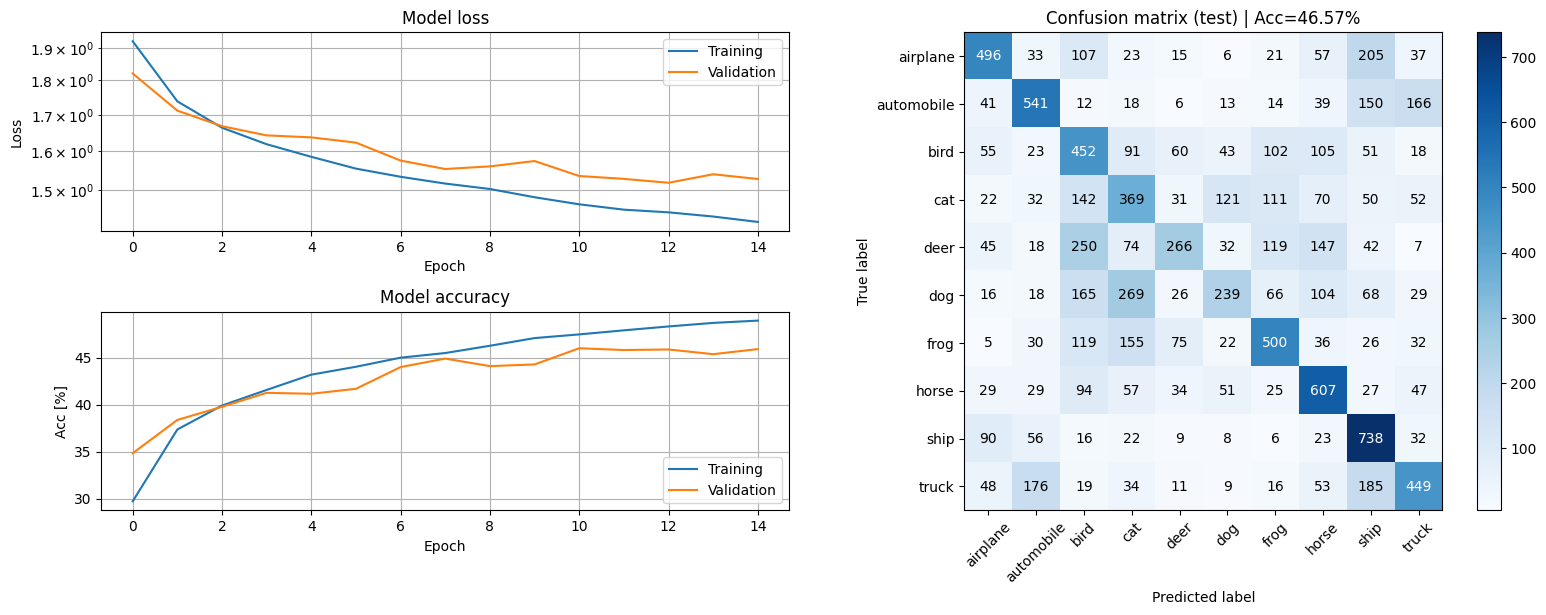

In [ ]:
from Custom import PlotModelEval

# Custom function for evaluating the model and plotting training history
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 2:</span>**
Train a model that achieves above 45% accuracy on the test data. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
We used ReLu as activation function as its fast to calculate and 3 layers with different number of nodes. The layers had 128, 64, 16 nodes and the amount of layers was to increase the number of parameters as we got low accuracy on both the training and validation data with a less complex model. The first layer with a large amount of nodes which we then reduced was a good way to increase complexity and get a better result without overfitting too much.

#### **<span style="color:red">Question 3:</span>**
Compare this model to the one you used for the MNIST dataset in the first assignment, in terms of size and test accuracy. Why do you think this dataset is much harder to classify than the MNIST handwritten digits?

#### **<span style="color:green">Answer:</span>**
We get a much lower accuracy for this model even though its much more complex, with more levels and parameters.

This data as probably harder to classify as the number dataset is generally easier to generalize for. The numbers are grey-scale, 1-dimensional from the same angle whereas for this dataset it's 3-dimensional with different angles of objects, colors etc.

### **3. CNN classifier**
We will now move on to a network architecture that is more suited for this problem, the convolutional neural network. The new layers you will use are ```Conv2D``` and ```MaxPooling2D```, which you can find the documentation of here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D and here https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D.

##### **Creating the CNN model**

A common way to build convolutional neural networks is to create blocks of layers of the form **[convolution - activation - pooling]**, and then stack several of these block to create the full convolution stack. This is often followed by a fully connected network to create the output classes. Use this recipe to build a CNN that acheives at least 62% accuracy on the test data.

*Side note. Although this is a common way to build CNNs, it is be no means the only or even best way. It is a good starting point, but later in part 5 you might want to explore other architectures to acheive even better performance.*

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:])(x_in) # convulution layer with 5x5 kernel, with relu activation

x = MaxPooling2D(2)(x) # maxpooling

x = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:])(x)# convulution layer with 3x3 kernel, with relu activation

x =  MaxPooling2D(2)(x) # maxpooling

x = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:])(x)# convulution layer with 3x3 kernel, with relu activation

x =  MaxPooling2D(2)(x) # maxpooling

x = Flatten()(x) # flatten

x = Dense(128, activation='relu')(x) # relu as activation
x = Dense(32, activation='relu')(x) # relu as activation
x = Dense(10, activation='softmax')(x) # 10 units as we have 10 labels
# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_17"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_20 (InputLayer)                       [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_26 (Conv2D)                          (None, 32, 32, 16)                      448            
                                                                                                    
 max_pooling2d_26 (MaxPooling2D)             (None, 16, 16, 16)                      0              
                                                                                                    
 conv2d_27 (Conv2D)                          (None, 16, 16, 16)                      6416           
                                                                         

##### **Training the CNN**

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 30s 23ms/step - loss: 1.7373 - accuracy: 0.3604 - val_loss: 1.4378 - val_accuracy: 0.4699
Epoch 2/15
1250/1250 [==============================] - 29s 23ms/step - loss: 1.3505 - accuracy: 0.5125 - val_loss: 1.3245 - val_accuracy: 0.5319
Epoch 3/15
1250/1250 [==============================] - 28s 23ms/step - loss: 1.2098 - accuracy: 0.5663 - val_loss: 1.1684 - val_accuracy: 0.5878
Epoch 4/15
1250/1250 [==============================] - 29s 23ms/step - loss: 1.1177 - accuracy: 0.6030 - val_loss: 1.1747 - val_accuracy: 0.5826
Epoch 5/15
1250/1250 [==============================] - 28s 23ms/step - loss: 1.0516 - accuracy: 0.6270 - val_loss: 1.0885 - val_accuracy: 0.6190
Epoch 6/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.9905 - accuracy: 0.6517 - val_loss: 1.1292 - val_accuracy: 0.6167
Epoch 7/15
1250/1250 [==============================] - 28s 23ms/step - loss: 0.9520 - accuracy: 0.6656 - val_loss: 1.0845 -

##### **Evaluating the CNN**

In [ ]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 1.105
Test accuracy = 0.637


313/313 [==============================] - 2s 7ms/step


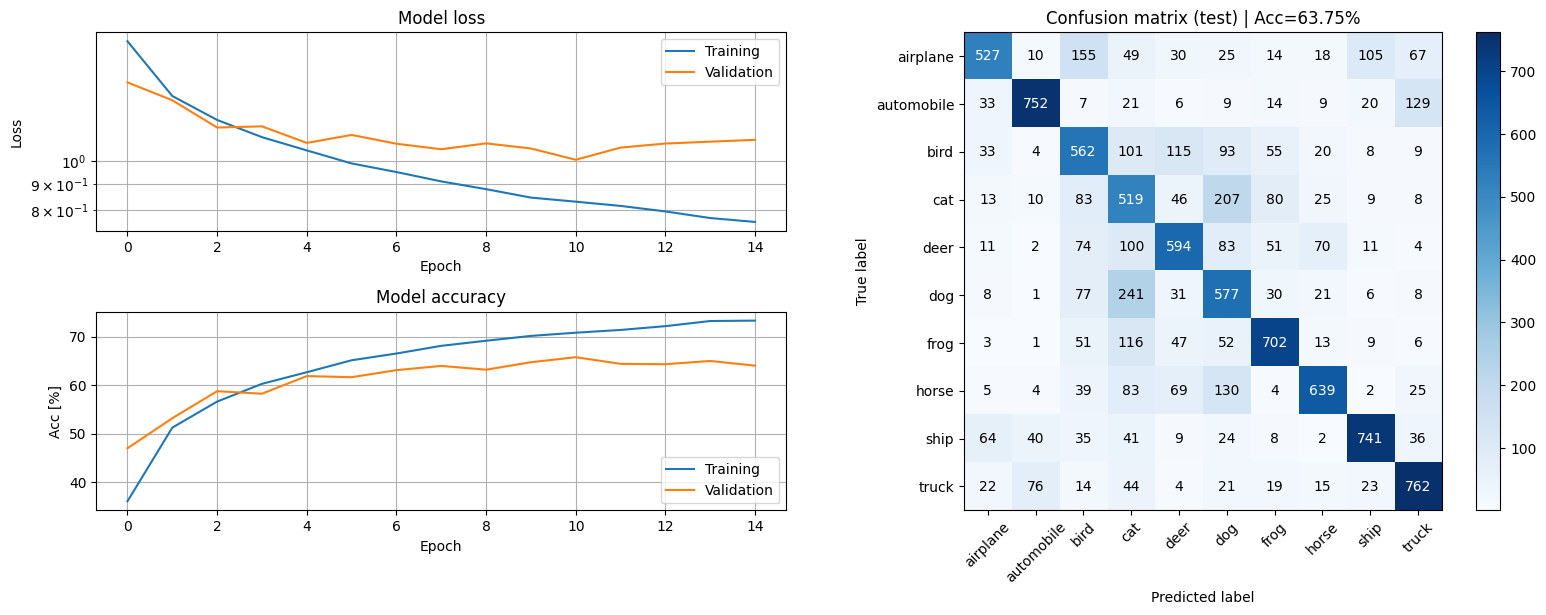

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 4:</span>**
Train a model that achieves at least 62% test accuracy. Provide a (short) motivation of your model architecture and briefly discuss the results.

#### **<span style="color:green">Answer:</span>**
We decided on using three convolution layers as using fewer than that resulted in overfitting on training data but subpar performance on test data. The kernel sizes for each layers was 3x3, 5x5, 5x5 which we decided on since realized smaller kernel sizes resulted in better performance. For the subsequent fully  connected layers we used fewer nodes (128, 32, 10) than for the previous question. We reasoned that the convolutional layers would learn the patterns well enough so we only required one large layer and could then reduce it quickly.

The model evaluation shows the model could be reduced as epoch 10 shows the best loss and accuracy values, which could be improved with early stopping.

#### **<span style="color:red">Question 5:</span>**
Compare this model with the previous fully connected model. You should find that this one is much more efficient, i.e. achieves higher accuracy with fewer parameters. Explain in your own words how this is possible.

#### **<span style="color:green">Answer:</span>**
This is due to the use of convolutional layers which are optimized to handle image data. The first network is a "normal" neural network which has to flatten the whole training set which results in very high dimensional data. The convolutional neural network can use the kernels to reduce the size of the data but maintain important information that it contains. This means that once data comes into the fully connected network i.e. the "normal" network, the dimension has been reduced very much and the most important features has been kept meaning it's less noise that can interfer with the classification.

### **4. Regularization**

#### **4.1 Dropout**
You have probably seen that your CNN model overfits the training data. One way to prevent this is to add ```Dropout``` layers to the model, that randomly "drops" hidden nodes each training-iteration by setting their output to zero. Thus the model cannot rely on a small set of very good hidden features, but must instead learns to use different sets of hidden features each time. Dropout layers are usually added after the pooling layers in the convolution part of the model, or after activations in the fully connected part of the model.

*Side note. In the next assignment you will work with Ensemble models, a way to use the output from several individual models to achieve higher performance than each model can achieve on its own. One way to interpret Dropout is that each random selection of nodes is a separate model that is trained only on the current iteration. The final output is then the average of outputs from all the individual models. In other words, Dropout can be seen as a way to build ensembling directly into the network, without having to train several models explicitly.*

Extend your previous model with the Dropout layer and test the new performance.

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:])(x_in) # convulution layer with 5x5 kernel, with relu activation

x = MaxPooling2D(2)(x) # maxpooling

x = Dropout(0.2)(x)

x = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:])(x)# convulution layer with 3x3 kernel, with relu activation

x =  MaxPooling2D(2)(x) # maxpooling

x = Dropout(0.2)(x)

x = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:])(x)# convulution layer with 3x3 kernel, with relu activation

x =  MaxPooling2D(2)(x) # maxpooling



x = Flatten()(x) # flatten

x = Dense(128, activation='relu')(x) # relu as activation
x = Dense(32, activation='relu')(x) # relu as activation
x = Dense(10, activation='softmax')(x) # 10 units as we have 10 labels
# ============================================

# ============================================

model = Model(inputs=x_in, outputs=x)

# Compile model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_2"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_3 (InputLayer)                        [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_3 (Conv2D)                           (None, 32, 32, 16)                      448            
                                                                                                    
 max_pooling2d_3 (MaxPooling2D)              (None, 16, 16, 16)                      0              
                                                                                                    
 dropout_2 (Dropout)                         (None, 16, 16, 16)                      0              
                                                                          

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8013 - accuracy: 0.3354 - val_loss: 1.5411 - val_accuracy: 0.4401
Epoch 2/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.4518 - accuracy: 0.4724 - val_loss: 1.3224 - val_accuracy: 0.5168
Epoch 3/15
1250/1250 [==============================] - 7s 5ms/step - loss: 1.3262 - accuracy: 0.5240 - val_loss: 1.3188 - val_accuracy: 0.5261
Epoch 4/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2329 - accuracy: 0.5577 - val_loss: 1.1841 - val_accuracy: 0.5785
Epoch 5/15
1250/1250 [==============================] - 7s 6ms/step - loss: 1.1753 - accuracy: 0.5809 - val_loss: 1.1596 - val_accuracy: 0.5823
Epoch 6/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1252 - accuracy: 0.5989 - val_loss: 1.0935 - val_accuracy: 0.6104
Epoch 7/15
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0927 - accuracy: 0.6128 - val_loss: 1.0630 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.998
Test accuracy = 0.658


313/313 [==============================] - 1s 2ms/step


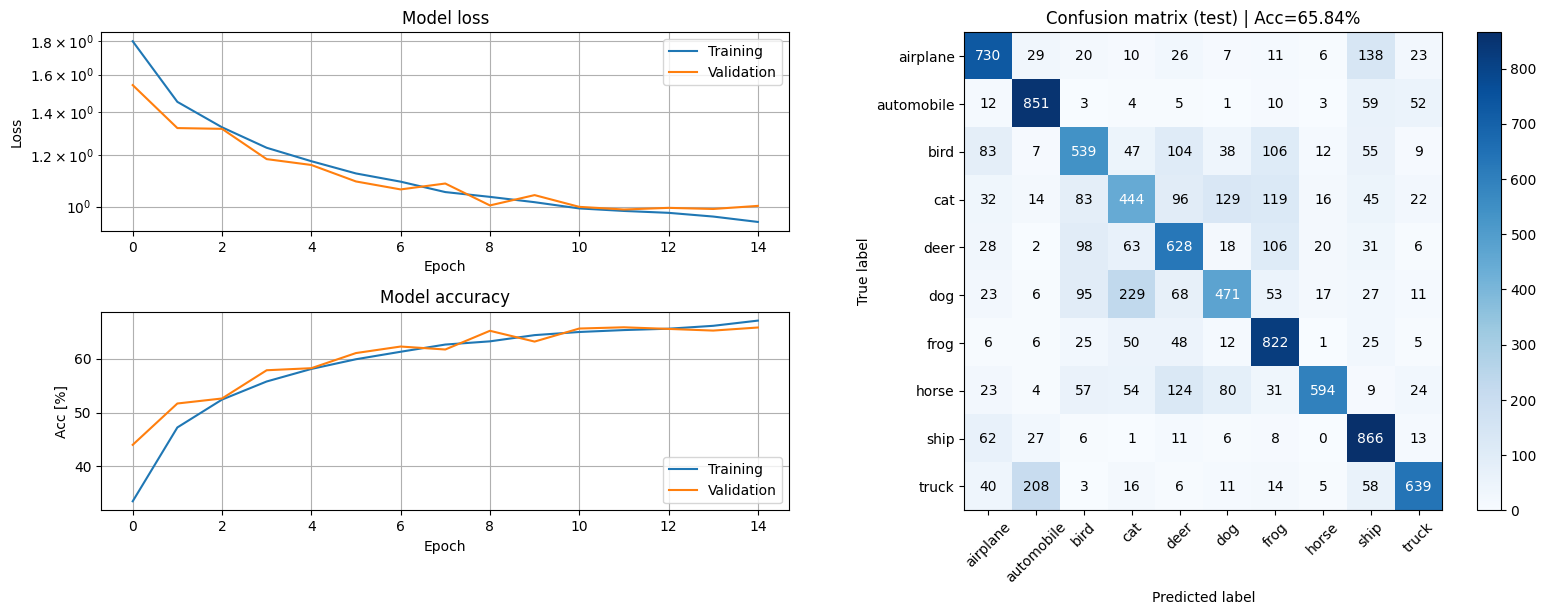

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 6:</span>**
Compare this model and the previous in terms of the training accuracy, validation accuracy, and test accuracy. Explain the similarities and differences (remember that the only difference between the models should be the addition of Dropout layers).

Hint: what does the dropout layer do at test time?

#### **<span style="color:green">Answer:</span>**
When using dropout we get a lower training accuracy but higher validation and test accuracy, this is the wanted effect of the dropout as the much of the overfitting is gone.

#### **4.2 Batch normalization**
The final layer we will explore is ```BatchNormalization```. As the name suggests, this layer normalizes the data in each batch to have a specific mean and standard deviation, which is learned during training. The reason for this is quite complicated (and still debated among the experts), but suffice to say that it helps the optimization converge faster which means we get higher performance in fewer epochs. The normalization is done separatly for each feature, i.e. the statistics are calculated accross the batch dimension of the input data. The equations for batch-normalizing one feature are the following, where $N$ is the batch size, $x$ the input features, and $y$ the normalized output features:

$$ \mu = \frac{1}{N} \sum_{i=0}^{N}x_i,\;\;\;\; \sigma^2 = \frac{1}{N} \sum_{i=0}^{N}(x_i - \mu)^2 $$

$$ \hat{x}_i = \frac{x_i - \mu}{\sqrt{\sigma^2 + \epsilon}} $$

$$ y_i = \gamma \hat{x}_i + \beta $$

At first glance this might look intimidating, but all it means is that we begin by scaling and shifting the data to have mean $\mu=0$ and standard deviation $\sigma=1$. After this we use the learnable parameters $\gamma$ and $\beta$ to decide the width and center of the final distribution. $\epsilon$ is a small constant value that prevents the denominator from being zero.

In addition to learning the parameters $\gamma$ and $\beta$ by gradient decent just like the weights, Batch Normalization also keeps track of the running average of minibatch statistics $\mu$ and $\sigma$. These averages are used to normalize the test data. We can tune the rate at which the running averages are updated with the *momentum* parameter of the BatchNormalization layer. A large momentum means that the statistics converge more slowly and therefore requires more updates before it represents the data. A low momentum, on the other hand, adapts to the data more quickly but might lead to unstable behaviour if the latest minibatches are not representative of the whole dataset. For this test we recommend a momentum of 0.75, but you probably want to change this when you design a larger network in Section 5.

The batch normalization layer should be added after the hidden layer linear transformation, but before the nonlinear activation. This means that we cannot specify the activation funciton in the ```Conv2D``` or ```Dense``` if we want to batch-normalize the output. We therefore need to use the ```Activation``` layer to add a separate activation to the network stack after batch normalization. For example, the convolution block will now look like **[conv - batchnorm - activation - pooling]**.

Extend your previous model with batch normalization, both in the convolution and fully connected part of the model.

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation=None, input_shape=X_train.shape[1:])(x_in) # convulution layer with 5x5 kernel, with relu activation

x = BatchNormalization(momentum=0.75)(x)

x = Activation('relu')(x)

x = MaxPooling2D(2)(x) # maxpooling

x = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation=None, input_shape=X_train.shape[1:])(x) # convulution layer with 5x5 kernel, with relu activation

x = BatchNormalization(momentum=0.75)(x)

x = Activation('relu')(x)

x =  MaxPooling2D(2)(x) # maxpooling

x = Conv2D(filters=16, kernel_size=(5, 5), padding='same', activation=None, input_shape=X_train.shape[1:])(x) # convulution layer with 5x5 kernel, with relu activation

x = BatchNormalization(momentum=0.75)(x)

x = Activation('relu')(x)

x =  MaxPooling2D(2)(x) # maxpooling



x = Flatten()(x) # flatten

x = Dense(128, activation='relu')(x) # relu as activation
x = Dense(32, activation='relu')(x) # relu as activation
x = Dense(10, activation='softmax')(x) # 10 units as we have 10 labels

# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)

Model: "model_19"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_27 (InputLayer)                       [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_40 (Conv2D)                          (None, 32, 32, 16)                      448            
                                                                                                    
 batch_normalization_4 (BatchNormalization)  (None, 32, 32, 16)                      64             
                                                                                                    
 activation_1 (Activation)                   (None, 32, 32, 16)                      0              
                                                                         

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
1250/1250 [==============================] - 38s 29ms/step - loss: 1.4463 - accuracy: 0.4721 - val_loss: 1.2146 - val_accuracy: 0.5656
Epoch 2/15
1250/1250 [==============================] - 36s 29ms/step - loss: 1.1103 - accuracy: 0.6076 - val_loss: 1.0561 - val_accuracy: 0.6205
Epoch 3/15
1250/1250 [==============================] - 36s 29ms/step - loss: 0.9785 - accuracy: 0.6550 - val_loss: 1.0582 - val_accuracy: 0.6316
Epoch 4/15
1250/1250 [==============================] - 36s 29ms/step - loss: 0.8985 - accuracy: 0.6838 - val_loss: 0.9547 - val_accuracy: 0.6616
Epoch 5/15
1250/1250 [==============================] - 39s 31ms/step - loss: 0.8427 - accuracy: 0.7030 - val_loss: 1.0375 - val_accuracy: 0.6277
Epoch 6/15
1250/1250 [==============================] - 36s 29ms/step - loss: 0.7926 - accuracy: 0.7232 - val_loss: 0.9127 - val_accuracy: 0.6875
Epoch 7/15
1250/1250 [==============================] - 36s 29ms/step - loss: 0.7457 - accuracy: 0.7383 - val_loss: 0.8820 -

In [ ]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.954
Test accuracy = 0.698


313/313 [==============================] - 3s 9ms/step


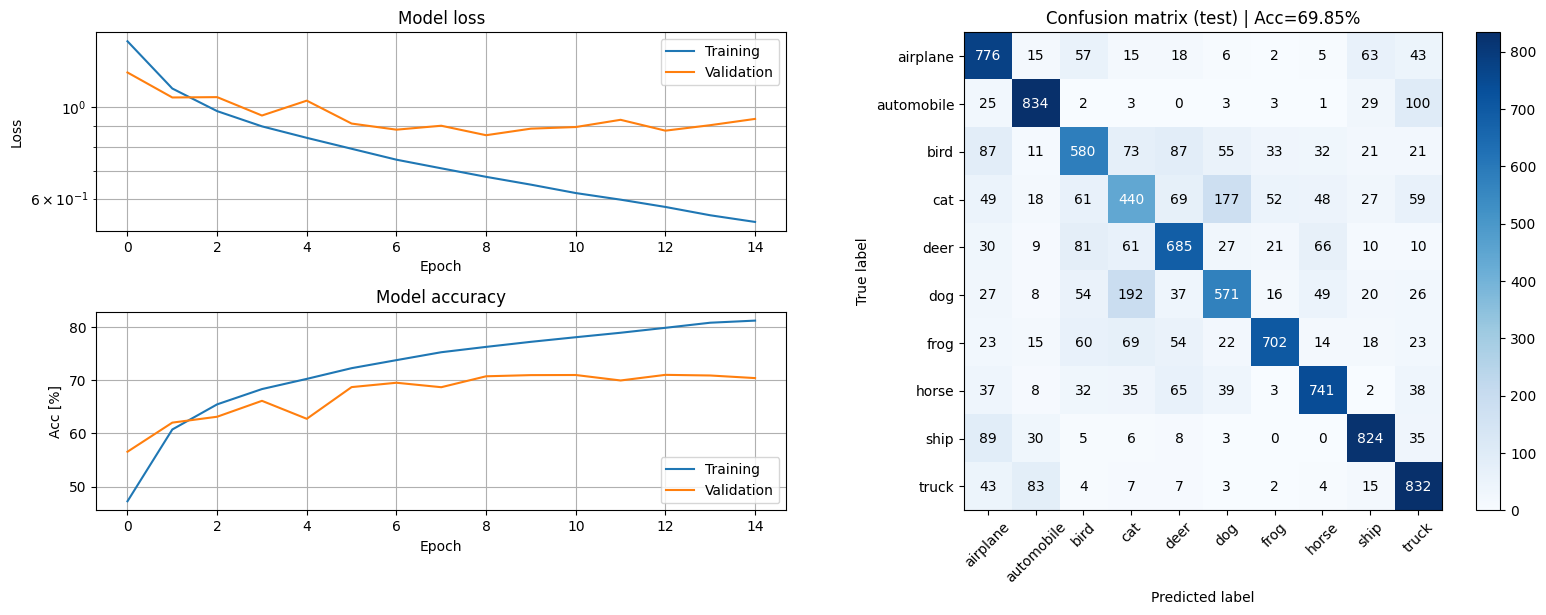

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 7:</span>**
When using BatchNorm one must take care to select a good minibatch size. Describe what problems might arise if:

1. The minibatch size is too small.
2. The minibatch size is too large.

You can reason about this given the description of BatchNorm above, or you can search for the information in other sources. Do not forget to provide links to the sources if you do!

#### **<span style="color:green">Answer:</span>**

1. Batchnormalization on a small minibach can lead to normalization with a mean and variance that are too noisy, a bigger batch will more likely lead to a better approximation of the mean and variance.

2. A too large minibatch will lead to more memory use and computational time which then can slow down the training process. It could also reduce too much of the noise we want to introduce with minibatch to create a more generalized model.

### **5. Putting it all together**
We now want you to create your own model based on what you have learned. We want you to experiment and see what works and what doesn't, so don't go crazy with the number of epochs until you think you have something that works.

To pass this assignment, we want you to acheive **75%** accuracy on the test data in no more than **25 epochs**. This is possible using the layers and techniques we have explored in this notebook, but you are free to use any other methods that we didn't cover. (You are obviously not allowed to cheat, for example by training on the test data.)

Model: "model_8"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_10 (InputLayer)                       [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_23 (Conv2D)                          (None, 32, 32, 16)                      448            
                                                                                                    
 batch_normalization_16 (BatchNormalization  (None, 32, 32, 16)                      64             
 )                                                                                                  
                                                                                                    
 dropout_20 (Dropout)                        (None, 32, 32, 16)           

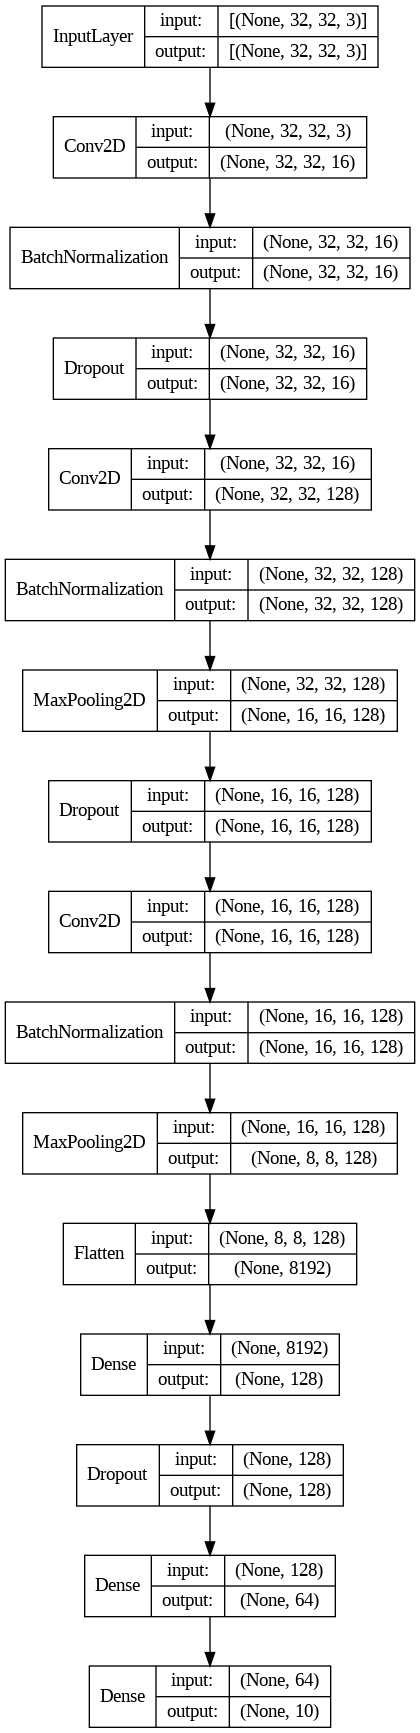

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
x_in = Input(shape=X_train.shape[1:])

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
x = Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=X_train.shape[1:])(x_in) # convulution layer with 5x5 kernel, with relu activation

x = BatchNormalization(momentum=0.99)(x)

x = Dropout(0.2)(x)

x = Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:])(x) # convulution layer with 5x5 kernel, with relu activation

x = BatchNormalization(momentum=0.99)(x)

x = MaxPooling2D(2)(x) # maxpooling

x = Dropout(0.3)(x)

x = Conv2D(filters=128, kernel_size=(5, 5), padding='same', activation='relu', input_shape=X_train.shape[1:])(x) # convulution layer with 5x5 kernel, with relu activation

x = BatchNormalization(momentum=0.99)(x)


x =  MaxPooling2D(2)(x) # maxpooling



x = Flatten()(x) # flatten

x = Dense(128, activation='relu')(x) # relu as activation
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x) # relu as activation
x = Dense(10, activation='softmax')(x) # 10 units as we have 10 labels


# ============================================

model = Model(inputs=x_in, outputs=x)

sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

In [ ]:
history = model.fit(X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
1250/1250 [==============================] - 17s 12ms/step - loss: 1.6808 - accuracy: 0.3901 - val_loss: 1.5684 - val_accuracy: 0.4377
Epoch 2/25
1250/1250 [==============================] - 15s 12ms/step - loss: 1.2762 - accuracy: 0.5525 - val_loss: 1.2303 - val_accuracy: 0.5815
Epoch 3/25
1250/1250 [==============================] - 16s 12ms/step - loss: 1.0744 - accuracy: 0.6301 - val_loss: 0.9909 - val_accuracy: 0.6544
Epoch 4/25
1250/1250 [==============================] - 16s 12ms/step - loss: 0.9433 - accuracy: 0.6819 - val_loss: 0.9002 - val_accuracy: 0.7009
Epoch 5/25
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8435 - accuracy: 0.7123 - val_loss: 0.9466 - val_accuracy: 0.6686
Epoch 6/25
1250/1250 [==============================] - 15s 12ms/step - loss: 0.7544 - accuracy: 0.7413 - val_loss: 0.8322 - val_accuracy: 0.7164
Epoch 7/25
1250/1250 [==============================] - 15s 12ms/step - loss: 0.6869 - accuracy: 0.7628 - val_loss: 0.7527 -

In [ ]:
score = model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.896
Test accuracy = 0.770


In [ ]:
from Custom import PlotModelEval

313/313 [==============================] - 1s 3ms/step


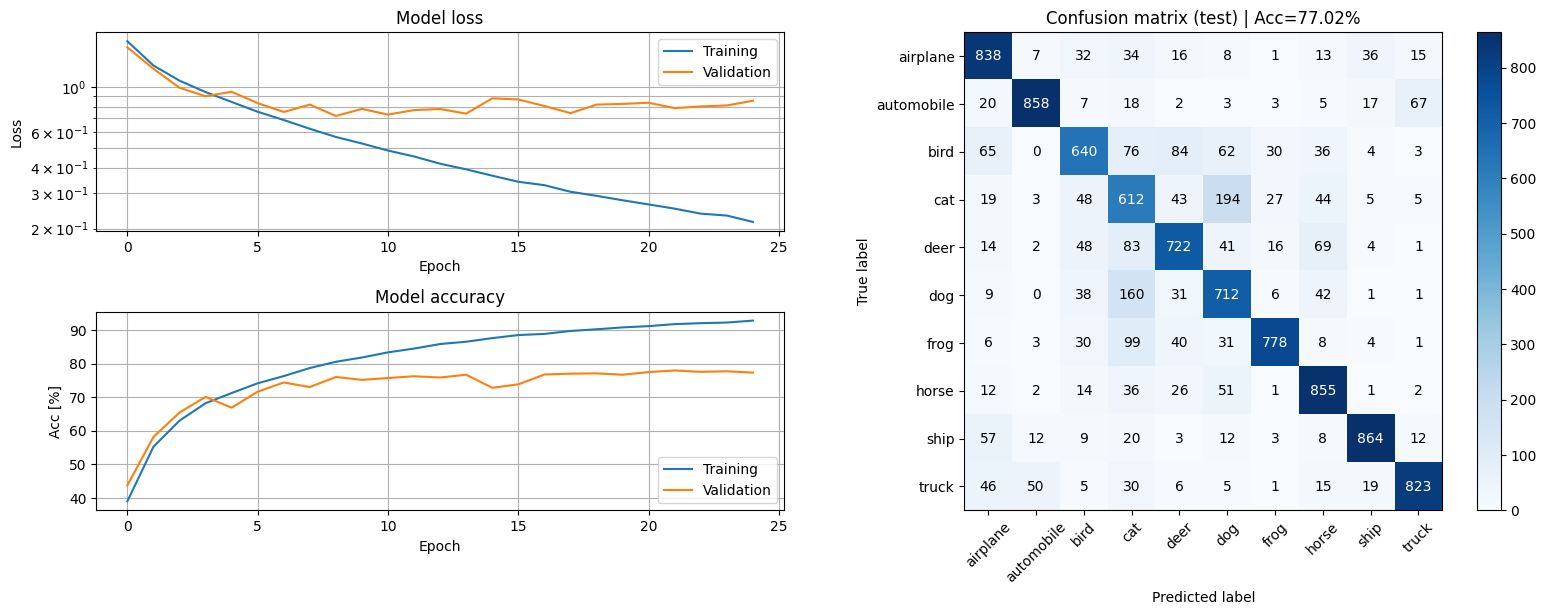

In [ ]:
PlotModelEval(model, history, X_test, y_test, cifar_labels)

#### **<span style="color:red">Question 8:</span>**
Design and train a model that achieves at least 75% test accuracy in at most 25 epochs. Explain your model architecture and motivate the design choices you have made.

#### **<span style="color:green">Answer:</span>**
Achieving the desired accuracy in at most 25 epochs required a rather complex model, in which we used bigger layers in the beginning to learn patterns and smaller layers in the end for classifying. We used 3 convolutional layers that were all followed by batch normalization to stabilize the network, and dropout to regularize it. After the last two convolutional layers we also used max pooling to reduce the dimensions by half. At last we flattened the data to be able to use it with fully connected layers, and used one big dense layer with 128 nodes which we used dropout on to regularize once again. The last two dense layers used 64 nodes and lastly 10 nodes to correctly classify the input.

---

### **Want some extra challenge?**
For those of you that want to get creative, here are some things to look into. But note that we don't have the answers here. Any of these might improve the performance, or might not, or it might only work in combination with each other. This is up to you to figure out. This is how deep learning research often happens, trying things in a smart way to see what works best.
* Tweak or change the optimizer or training parameters.
* Tweak the filter parameters, such as numbers and sizes of filters.
* Use other activation functions.
* Add L1/L2 regularization (see https://www.tensorflow.org/api_docs/python/tf/keras/regularizers)
* Include layers that we did not cover here (see https://www.tensorflow.org/api_docs/python/tf/keras/layers). For example, our best model uses the global pooling layers.
* Take inspiration from some well-known architectures, such as ResNet or VGG16. (But don't just copy-paste those architectures. For one, what's the fun in that? Also, they take a long time to train, you will not have time.)
* Use explicit model ensembing (training multiple models that vote on or average the outputs - this will also take a lot of time.)
* Use data augmentation to create a larger training set (see https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

Model: "model_15"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 input_17 (InputLayer)                       [(None, 32, 32, 3)]                     0              
                                                                                                    
 conv2d_50 (Conv2D)                          (None, 32, 32, 16)                      448            
                                                                                                    
 batch_normalization_43 (BatchNormalization  (None, 32, 32, 16)                      64             
 )                                                                                                  
                                                                                                    
 activation_27 (Activation)                  (None, 32, 32, 16)          

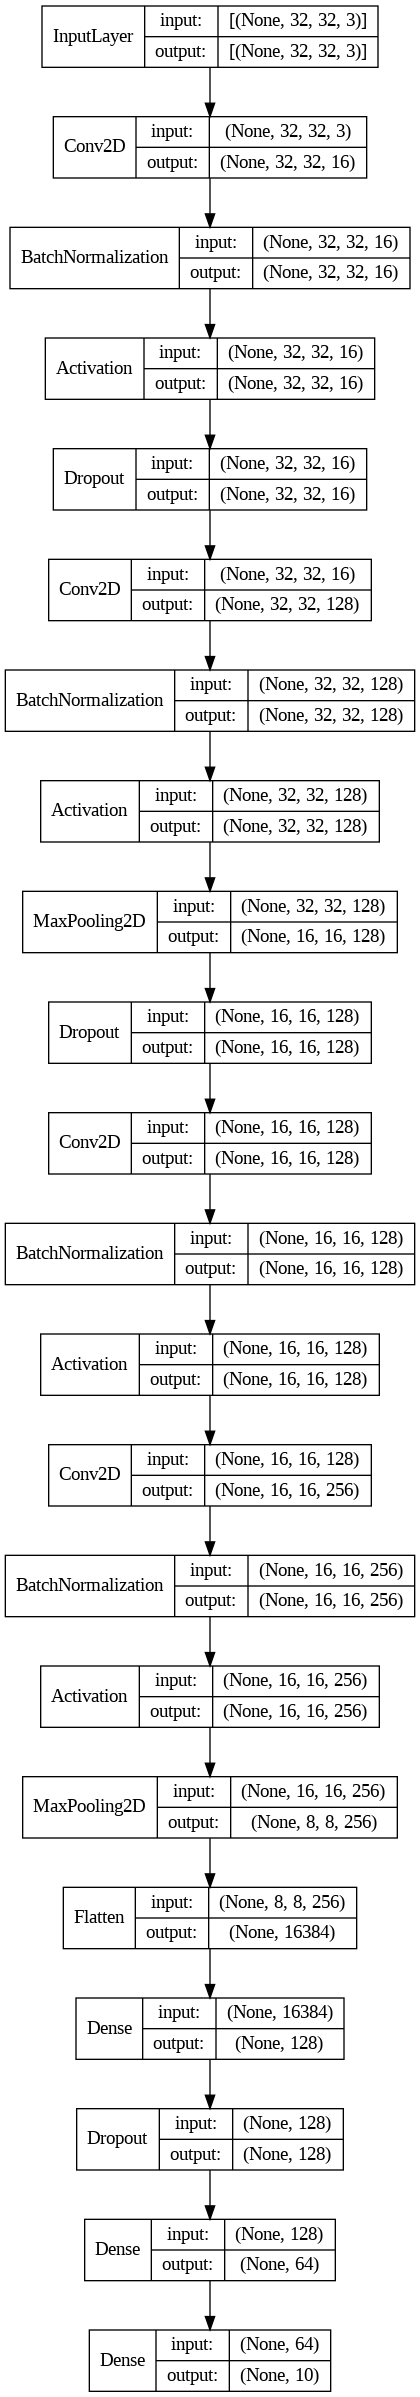

In [ ]:
# trying transfer learning from VGG16
input_shape = X_train[0].shape
# VGG16  keras
vgg_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=input_shape,classes=10)

inputs = vgg_model.inputs
my_model = vgg_model.get_layer('block3_pool').output

my_model = tf.keras.layers.BatchNormalization(axis=-1)(my_model) # normaliserar inputs
my_model = Dropout(0.2)(my_model)  # Dropout  20%
my_model = Conv2D(filters=96,
                        kernel_size=5,
                        activation='relu',
                        padding='same')(my_model)

my_model=(tf.keras.layers.Flatten())(my_model) # 'full connected'

my_model=(tf.keras.layers.Dense(64,activation='relu',kernel_regularizer='l1' ))(my_model)
my_model = Dropout(0.2)(my_model)  # Dropout  20%
outputs=(Dense(units=10, activation='softmax'))(my_model)
my_model = tf.keras.models.Model(inputs=inputs, outputs=outputs)


# Training layers from VGG16
for layer in my_model.layers:
  layer.trainable = True

# Freeze the layers
for layer in my_model.layers[:-9]:
    layer.trainable = False


# Print the summary and model image
model.summary(100)
plot_model(model, show_shapes=True, show_layer_names=False)

# ============================================

In [ ]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.utils import plot_model
earlystop= EarlyStopping(monitor='val_loss', patience=4,restore_best_weights = True) # loading earlystopping, and saving the best weights on the validation data


my_model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # ändrat inlärningstakten
  loss='categorical_crossentropy',
  metrics=['accuracy'],

)


epochs = 50 # Antal epoker som kan köras
batch_size = 96 # batchstoleken

# Train the model.
history = my_model.fit(
  X_train, y_train_c, batch_size=32, epochs=25, verbose=1, validation_split=0.2,
  callbacks=[earlystop] # earlystopping
)


Epoch 1/25
1250/1250 [==============================] - 13s 9ms/step - loss: 2.4177 - accuracy: 0.6458 - val_loss: 1.3489 - val_accuracy: 0.6864
Epoch 2/25
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1975 - accuracy: 0.7380 - val_loss: 1.2408 - val_accuracy: 0.7196
Epoch 3/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0891 - accuracy: 0.7674 - val_loss: 1.1353 - val_accuracy: 0.7481
Epoch 4/25
1250/1250 [==============================] - 10s 8ms/step - loss: 1.0076 - accuracy: 0.7896 - val_loss: 1.1626 - val_accuracy: 0.7494
Epoch 5/25
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9525 - accuracy: 0.8020 - val_loss: 1.0882 - val_accuracy: 0.7635
Epoch 6/25
1250/1250 [==============================] - 10s 8ms/step - loss: 0.9070 - accuracy: 0.8156 - val_loss: 1.0019 - val_accuracy: 0.7878
Epoch 7/25
1250/1250 [==============================] - 9s 7ms/step - loss: 0.8549 - accuracy: 0.8238 - val_loss: 0.9928 - val_acc

In [ ]:
score = my_model.evaluate(X_test, y_test_c, batch_size=128, verbose=0)

for i in range(len(score)):
    print("Test " + my_model.metrics_names[i] + " = %.3f" % score[i])

Test loss = 0.930
Test accuracy = 0.806


313/313 [==============================] - 1s 4ms/step


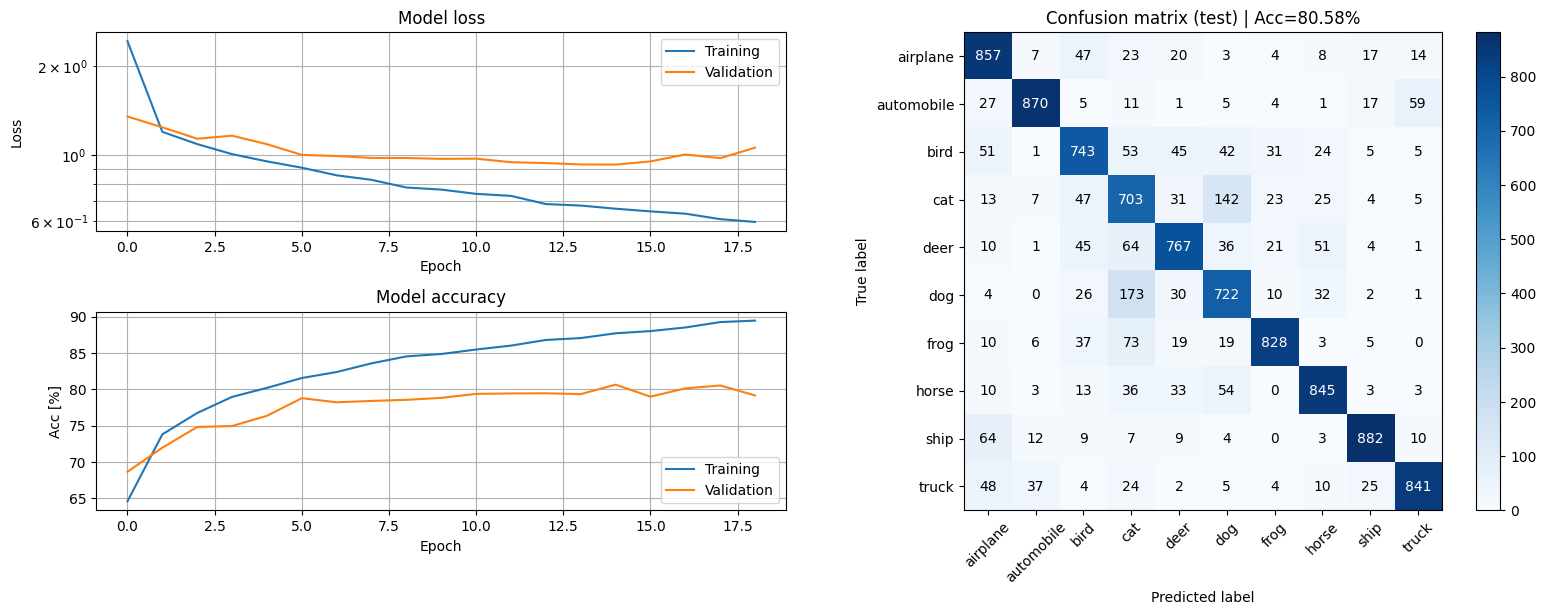

In [ ]:
PlotModelEval(my_model, history, X_test, y_test, cifar_labels)